# Pyhton Web-Scraping from a Static Website

In this notebook, we will learn how to scrape some data from a static website.  A static web page is a web page that is delivered to the user's web browser exactly as stored
 
#### Required Libraries:
 
 > requests -  this module allows user to send HTTP requests using Python and to get the response text.
 
 > bs4 - Beautiful Soup is a Python package for parsing HTML and XML documents. It creates parse trees that is helpful to extract the data easily.
 
 > pandas - to store the data in a structured format
 
#### Steps:

 > Find the URL that you want to scrape. (As per the business requirement)
 
 > Inspect the website. Select the informations that you want to scrape. (As per the business requirement)
 
 > Nevigate to the specific pages (by changing a specific word in the main url using a loop)
 
 > A request is sent to the page that is being scraped (using requests module)
 
 > The server will send the data and allows you to read the HTML or XML page from that page
 
 > Find the data you want to extract (by inspecing the page) - using bs4.BeautifulSoup module
 
 > Extract the data ( using regular expressions)
 
 > Store the data in the required format 

### URL That We want to scrape

In this Jupyter Notebook, we are scraping news articles from  'https://www.politifact.com/'. The data includes Title, author, category, date, summary, full article and sources of the article.


Reference : https://randerson112358.medium.com/scrape-a-political-website-for-fake-real-news-using-python-b4f5b2af830b


In [268]:
url = 'https://www.politifact.com/'

After inspecting the website I found that the website has many web pages and each web page has list of some articles. The link of first 5 webpages are as below:
    
    https://www.politifact.com/article/list/?page=1
    https://www.politifact.com/article/list/?page=2
    https://www.politifact.com/article/list/?page=3
    https://www.politifact.com/article/list/?page=4
    https://www.politifact.com/article/list/?page=5
    
As we can see that only last digit is changing (increasing by 1) in these webpages.

Hence we defile our base url as below:

In [269]:
base_url = 'https://www.politifact.com/article/list/?page={}'

### Selecting the information that we want to scrape

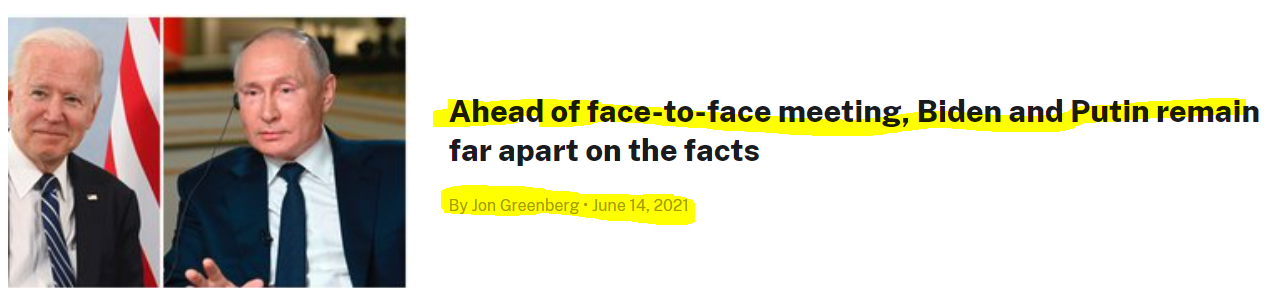

### tags

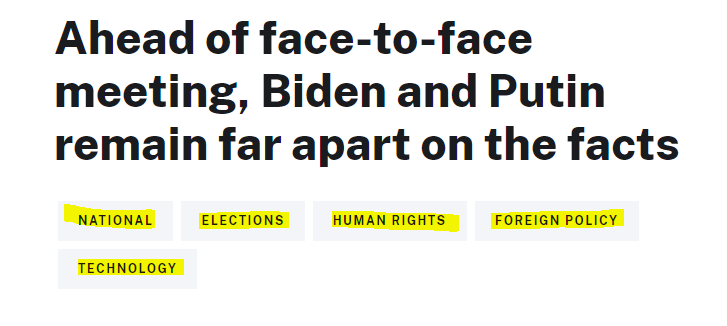

### summary

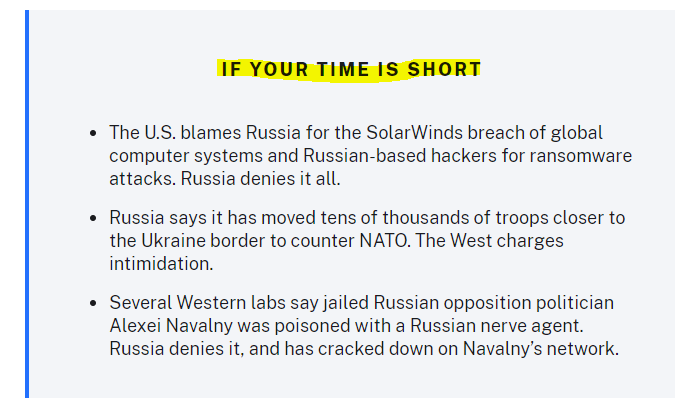

### full article

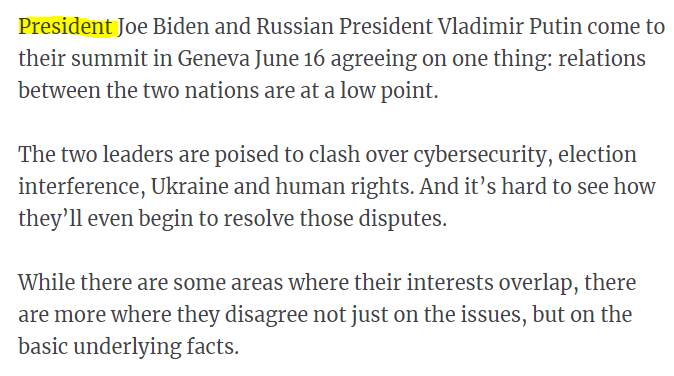

If we look at each article, we would like to scrape Title of the article, author and the date. Further We would like to go to the article and get the category labels, summary and full content of the article.

So we will define our data frame column names are follows:

In [310]:
column_names = ['Sr_No',  'base_url', 'article_url', 'Title', 'author', 'date', 'category_labels', 'summary', 'full_article', 'sources']

#### Inspecting the page for parsing

This is basically to tell the bs4 paser where the data exists on the webpage. 

Right click on the webpage and click inspect. or Simply press F12.

### inspect element for title, link, author and date

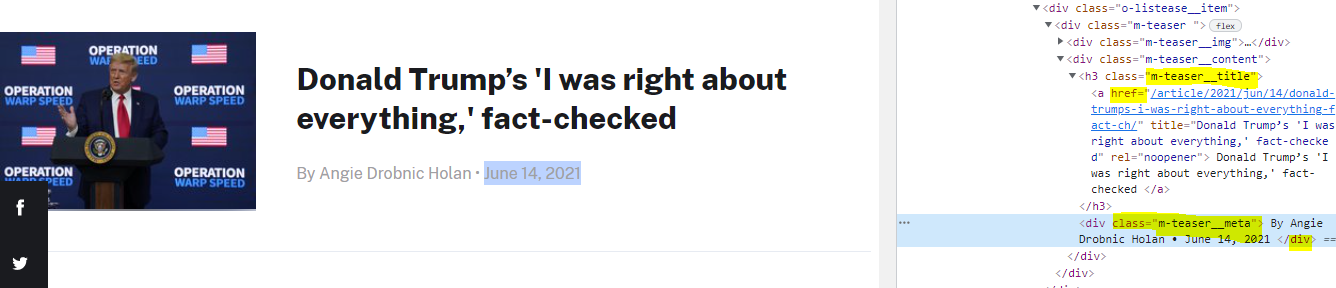

### inspect element for tags

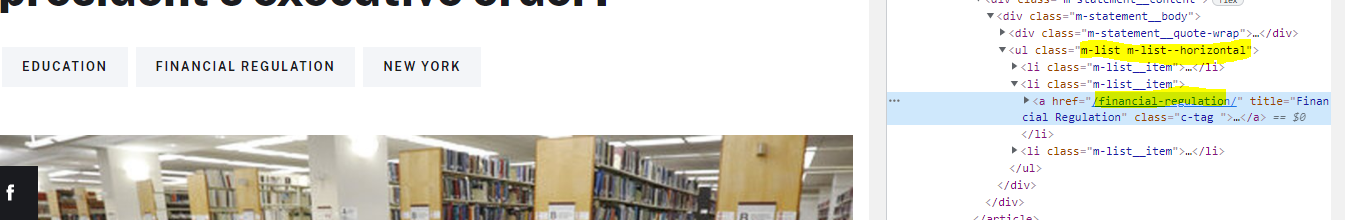

### inspect element for full article

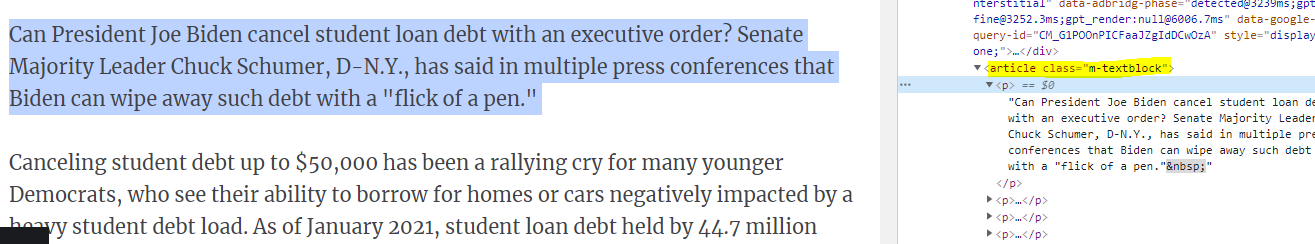

### inspect element for summary box

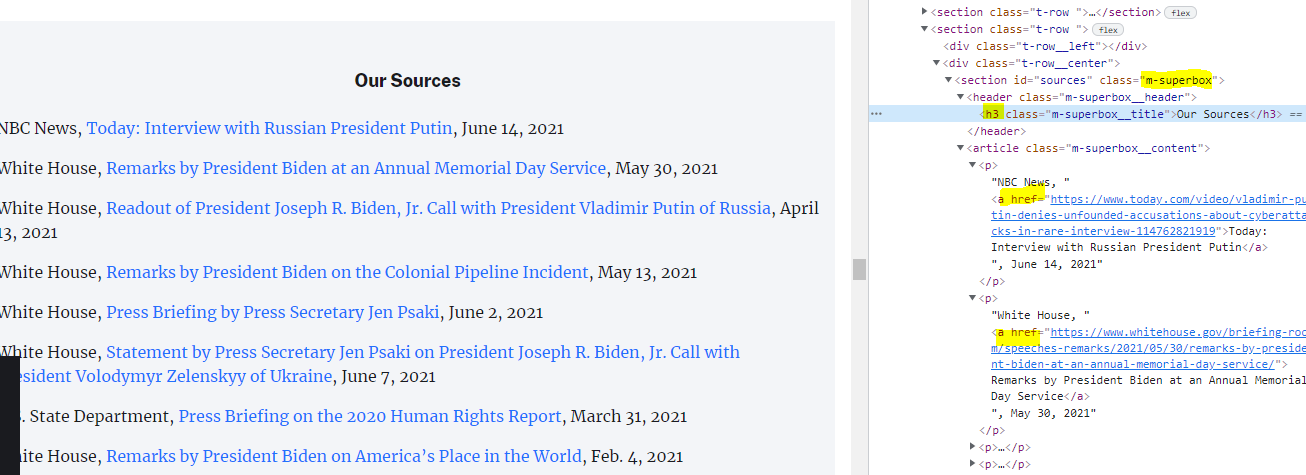

# Importing Libraries

In [311]:
import requests
import bs4
import pandas as pd
import time

In [330]:
column_names = ['Sr_No',  'base_url', 'article_url', 'Title', 'author', 
                'date', 'category_labels', 'summary', 'full_article', 'sources']
df = pd.DataFrame(columns = column_names)
base_url = 'https://www.politifact.com/article/list/?page={}'
main_url = 'https://www.politifact.com'
k=0
for i in range(1,20):
    #print(i)
   
    scrape_url = base_url.format(i)
    #print(scrape_url)

    res = requests.get(scrape_url)
    time.sleep(0.5)
       
    soup = bs4.BeautifulSoup(res.text,"lxml")
    
    link_title = soup.find_all('h3',attrs={'class':'m-teaser__title'})
    #print(link_title)
    
    auther_date = soup.find_all('div', attrs={'class':'m-teaser__meta'})
    #print(auther_date)
    
    for j in range(len(link_title)):
        title = link_title[j].a['title']
        author = auther_date[j].text.split("•")[0]
        date = auther_date[j].text.split("•")[1]
        
        full_link_extension = link_title[j].a['href']
        full_link = main_url + full_link_extension
        #print(full_link)
        
        res2 = requests.get(full_link)
        time.sleep(2)
        soup2 = bs4.BeautifulSoup(res2.text,"lxml")
        
        summary_html = soup2.find_all('div',attrs={'class':'m-callout__body'})
        
        summary = summary_html[0].text
        
        article_html = soup2.find_all('article', attrs={'class':'m-textblock'})
        
        article = article_html[0].text
        
        tags =  soup2.find_all('a', attrs={'class':'c-tag'})
        
        tag_list = []
        for tag in tags:
            tag_list.append(tag.text.strip())
            
            
        sources = soup2.find_all( attrs={'class':'m-superbox'})
        
        source_list= []
        
        for p in sources[0].find_all('p'):
    
            if len(p.select('a')) ==0:
                source_list.append((p.text,"No link" ))
            else:
                source_list.append((p.text,p.select('a')[0].get('href') ))


        df = df.append({'Sr_No':k, 
                        'base_url':scrape_url,
                        'article_url':full_link,
                        'Title':title,
                        'author':author,                            
                        'date': date,
                        'category_labels': tag_list,
                        'summary': summary,
                        'full_article': article,
                        'sources': source_list
                       }, ignore_index=True)
        
        k+=1

In [331]:
df.head()

,Sr_No,base_url,article_url,Title,author,date,category_labels,summary,full_article,sources
0,0,https://www.politifact.com/article/list/?page=1,https://www.politifact.com/article/2021/aug/04...,The CDC’s new eviction moratorium: Is it legal?,\nBy Louis Jacobson,"August 4, 2021\n","[Homeless, Housing, Legal Issues]",\n\n\nThe Principles of the Truth-O-Meter\n\n\n,\nThe Biden administration issued a new evicti...,"[(PolitiFact, ""Nancy Pelosi’s dubious claim ab..."
1,1,https://www.politifact.com/article/list/?page=1,https://www.politifact.com/article/2021/aug/03...,What’s happening with the federal eviction mor...,\nBy Jon Greenberg,"August 3, 2021\n","[National, Housing, Coronavirus]",\n\n\n\nA CDC-ordered eviction moratorium expi...,"\nEDITOR’S NOTE, Aug. 4, 2021: On Aug. 3, the ...","[(Treasury Department, Emergency Rental Assist..."
2,2,https://www.politifact.com/article/list/?page=1,https://www.politifact.com/article/2021/jul/29...,Ask PolitFact: When will the COVID-19 vaccines...,\nBy Miriam Valverde,"July 29, 2021\n","[Government Regulation, Public Health, Coronav...",\n\n\n\nUnder the Food and Drug Administration...,\nQuestion: When will the COVID-19 vaccines ge...,"[(FDA.gov, Guidance for Industry Expedited Pro..."
3,3,https://www.politifact.com/article/list/?page=1,https://www.politifact.com/article/2021/jul/28...,How contagious is the delta variant? It isn’t ...,\nBy Amy Sherman,"July 28, 2021\n",[Coronavirus],\n\n\n\nPreliminary research in China shows th...,\nThe delta variant now represents more than 8...,"[(MedRxiV, Viral infection and transmission in..."
4,4,https://www.politifact.com/article/list/?page=1,https://www.politifact.com/article/2021/jul/28...,"Mailbag: 'Show me your better side,' and other...",\nBy Jon Greenberg,"July 28, 2021\n",[National],\n\n\nThe Principles of the Truth-O-Meter\n\n\n,"\nFalsehoods about the 2020 election results, ...",[(Comments on PolitiFact’s Facebook page and e...


In [332]:
df.shape

(380, 10)

This is how we have scraped 380 articles from the website in less than 10 minutes

In [333]:
#we can save this in a excel file locally
df.to_excel(r'news_articles.xlsx', index = True)